In [2]:
import matplotlib.pyplot as plt
import numpy as np
import json
import os
from datetime import datetime
import seaborn as sns
import pandas as pd

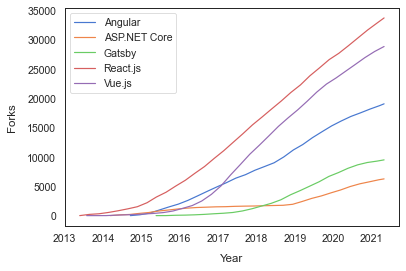

In [13]:
dt = []
for file_name in os.listdir("../../data/final"):
    if file_name.endswith(".json"):
        with open(f'../../data/final/{file_name}') as json_file:                
            name = file_name[:-5]            
            data = json.load(json_file)

            dt += [{"date": datetime.strptime(d["date"], '%Y-%m-%d'), "stars": d["stargazers"], "project": name} for d in data]
        

dt = sorted(dt, key=lambda k: k['project'])
sns.set_theme(context="paper", palette="muted", style="white", font='sans-serif', font_scale=1.2)
df = pd.DataFrame(data={'dates': [record["date"] for record in dt], 'stars': [record["stars"] for record in dt], 'projects': [record["project"] for record in dt]})

g = sns.lineplot(data=df, x="dates", y="stars", hue="projects", sort=False)
g.set_xlabel("Year")
g.set_ylabel("Stars")
g.xaxis.labelpad = 10
g.yaxis.labelpad = 10

handles, labels = g.get_legend_handles_labels()
labels=["Angular", "ASP.NET Core", "Gatsby", "React.js", "Vue.js"]
g.legend(handles,labels)

fig = g.get_figure()
fig.savefig('../../figures/metrics/joint/stars.pdf', format='pdf', bbox_inches="tight")